## Global setting

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import scrublet 
from matplotlib.pyplot import rc_context
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
%config InlineBackend.figure_format = 'retina'
sc.settings.set_figure_params(dpi=50, dpi_save=300, figsize=(5, 5),color_map='Reds')

In [73]:
os.chdir('/disk212/yupf/database/scRNA-seq/NewAtlas')
concat_file='./atlas_concat.h5ad'
QC_file='./atlas_qc.h5ad'
reduction_file = './atlas_rd.h5ad'
harmony_file='./atlas_harm.h5ad'
scVI_file='./atlas_scvi.h5ad'
level1_annotation_file ='./atlas_level1.h5ad'
level2_annotation_file ='./atlas_level2.h5ad'
level3_annotation_file='./atlas_level3.h5ad'

## level2 showing

In [37]:
adata=sc.read_h5ad(level2_annotation_file)

In [38]:
adata

AnnData object with n_obs × n_vars = 589101 × 19346
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Lineage', 'CellType', 'lym'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'CellType_colors', 'Lineage_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'lym_colors', 'majority_voting_colors', 'neighbors', 'project_colors', 'tsne', 'umap'
    obsm: 'X_scVI', 'X_tsne', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


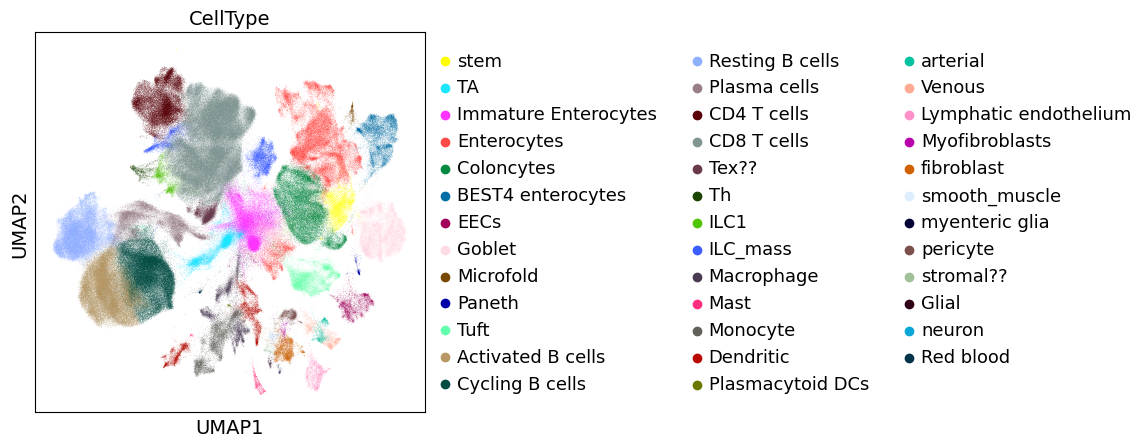

In [58]:
sc.pl.umap(adata,color='CellType')

In [69]:
adata.obs['Lineage'].cat.categories.to_list()

['Epithelial lineage',
 'B lineage',
 'T/ILC lineage',
 'Myeloid lineage',
 'Endothelial lineage',
 'Mesenchymal lineage',
 'Neuron Lineage',
 'Red blood']

In [67]:
adata.obs['CellType'].cat.categories.to_list()

['stem',
 'TA',
 'Immature Enterocytes',
 'Enterocytes',
 'Coloncytes',
 'BEST4 enterocytes',
 'EECs',
 'Goblet',
 'Microfold',
 'Paneth',
 'Tuft',
 'Activated B cells',
 'Cycling B cells',
 'Resting B cells',
 'Plasma cells',
 'CD4 T cells',
 'CD8 T cells',
 'Tex??',
 'Th',
 'ILC1',
 'ILC_mass',
 'Macrophage',
 'Mast',
 'Monocyte',
 'Dendritic',
 'Plasmacytoid DCs',
 'arterial',
 'Venous',
 'Lymphatic endothelium',
 'Myofibroblasts',
 'fibroblast',
 'smooth_muscle',
 'myenteric glia',
 'pericyte',
 'stromal??',
 'Glial',
 'neuron',
 'Red blood']

In [68]:
adata.obs['CellType'].value_counts()

CellType
CD8 T cells              128304
Cycling B cells           59515
Activated B cells         57698
Enterocytes               45780
Resting B cells           39715
Coloncytes                33873
CD4 T cells               31054
Immature Enterocytes      30447
Goblet                    20086
Plasma cells              19565
ILC_mass                  12696
TA                        12680
BEST4 enterocytes         12179
Tuft                      10904
Monocyte                  10691
stem                       9017
Macrophage                 8564
Dendritic                  8551
Tex??                      6987
fibroblast                 5179
EECs                       4980
ILC1                       3722
Lymphatic endothelium      2772
Venous                     2253
pericyte                   2162
neuron                     2020
Th                         1586
arterial                   1459
Mast                       1071
Microfold                   803
smooth_muscle               768

## uncertain cells 

1.Tex?
2.ILC_mass
3.stromal??

## level3 annotation

In [70]:
def function(a):
    if a in ['stem', 'TA','Paneth']:
        return "Crypt"
    elif a in ['Immature Enterocytes', 'Enterocytes', 'Coloncytes']:
        return "Enterocytes"
    elif a in ['BEST4 enterocytes']:
        return "BEST4 enterocytes"
    elif a in ['EECs']:
        return "EECs"
    elif a in ['Goblet']:
        return "Goblet"
    elif a in ['Microfold']:
        return "Microfold"
    elif a in ['Tuft']:
        return "Tuft"
    elif a in ['Activated B cells', 'Cycling B cells', 'Resting B cells']:
        return "B cells"
    elif a in ['Plasma cells']:
        return "Plasma cells"
    elif a in ['CD4 T cells', 'CD8 T cells', 'Tex??', 'Th']:
        return "T cells"
    elif a in ['ILC1', 'ILC_mass']:
        return "ILC"
    elif a in ['Macrophage', 'Mast', 'Monocyte', 'Dendritic', 'Plasmacytoid DCs']:
        return "Myeloid"
    elif a in ['arterial', 'Venous', 'Lymphatic endothelium']:
        return "Endothelial"
    elif a in ['Myofibroblasts', 'fibroblast', 'smooth_muscle', 'myenteric glia', 'pericyte', 'stromal??']:
        return "Mesenchymal"
    elif a in ['Glial', 'neuron']:
        return "Neuron"
    elif a in ['Red blood']:
        return "Red blood"
df = adata.obs
df["level3"] = df.apply(lambda x: function(x['CellType']),axis=1)
adata.obs=df 

/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


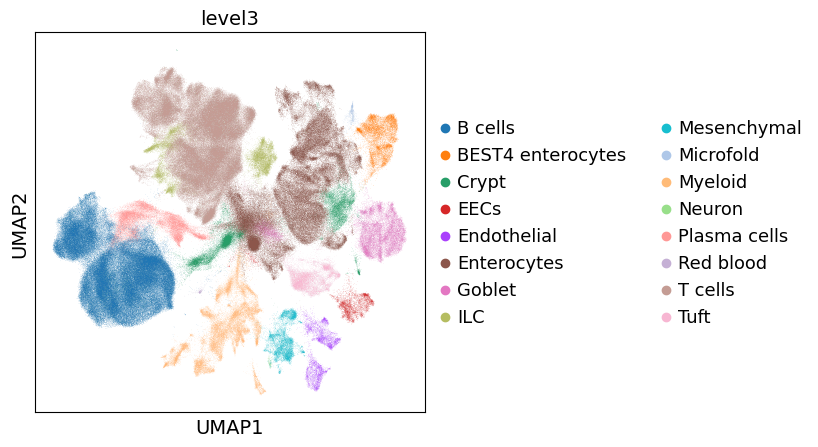

In [72]:
sc.pl.umap(adata,color='level3')

In [74]:
adata.write(level3_annotation_file)